In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsHalfDime = coins[coins['Denom'] == 'HalfDime']
coinsHalfDime = coinsHalfDime[['Year', 'Mint_State', 'Value']]

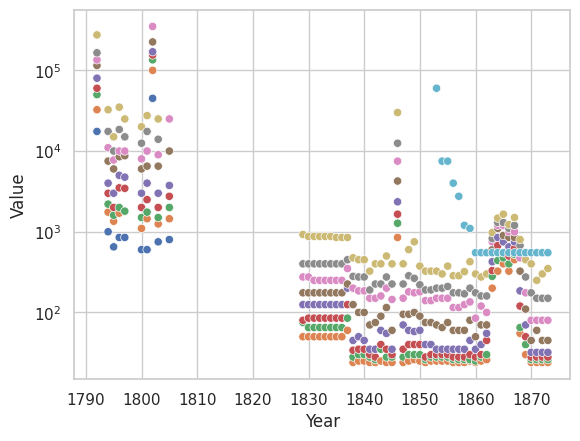

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfDime, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsHalfDime)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year Mint_State    Value
2932  1792      AGood  17500.0
2933  1792       Good  32500.0
2934  1792      VGood  50000.0
2935  1792       Fine  60000.0
2936  1792      VFine  80000.0
...    ...        ...      ...
3218  1853      Proof  60000.0
3227  1854      Proof   7500.0
3236  1855      Proof   7500.0
3245  1856      Proof   4000.0
3254  1857      Proof   2750.0

[71 rows x 3 columns]


In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2943, 2944,
       2945, 2946, 2947, 2948, 2949, 2954, 2955, 2956, 2957, 2958, 2962,
       2963, 2964, 2965, 2966, 2967, 2969, 2971, 2972, 2973, 2974, 2975,
       2976, 2981, 2982, 2983, 2984, 2985, 2989, 2990, 2991, 2992, 2993,
       2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3006, 3007, 3008,
       3009, 3010, 3014, 3015, 3016, 3017, 3157, 3158, 3159, 3160, 3161,
       3218, 3227, 3236, 3245, 3254])

In [32]:
for i in indicies:
  coinsHalfDime = coinsHalfDime.drop(i)

In [33]:
coinsHalfDime

,Year,Mint_State,Value
2941,1794,AGood,1000.0
2942,1794,Good,1750.0
2950,1795,AGood,650.0
2951,1795,Good,1350.0
2952,1795,VGood,1600.0
...,...,...,...
3394,1873,EFine,45.0
3395,1873,AUncirculated,80.0
3396,1873,MintState60,150.0
3397,1873,MintState63,350.0


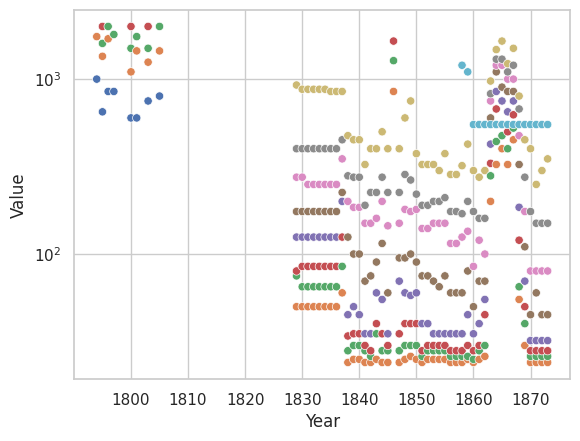

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfDime, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsHalfDime["Mint_State"] = lencMS.fit_transform(coinsHalfDime["Mint_State"])
coinsHalfDime["Mint_State"]

2941    0
2942    4
2950    0
2951    4
2952    9
       ..
3394    2
3395    1
3396    5
3397    6
3398    7
Name: Mint_State, Length: 396, dtype: int64

In [36]:
coinsHalfDime['log_Value'] = np.log(coinsHalfDime['Value'])

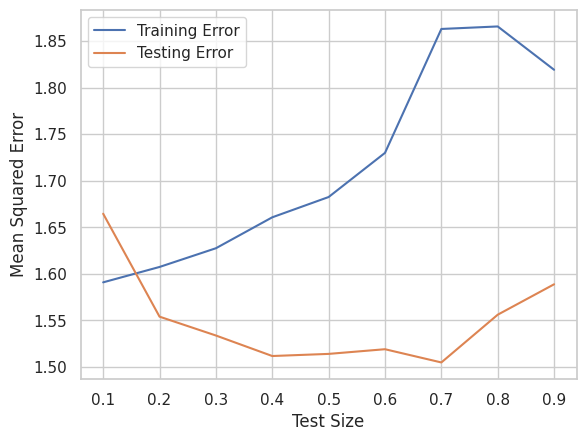

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsHalfDime.iloc[:,0:2]
y = coinsHalfDime.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsHalfDime.iloc[:,0:2]
Y = coinsHalfDime.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.15, random_state=0)

In [39]:
X

,Year,Mint_State
2941,1794,0
2942,1794,4
2950,1795,0
2951,1795,4
2952,1795,9
...,...,...
3394,1873,2
3395,1873,1
3396,1873,5
3397,1873,6


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

29978.34027985107

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.02038943 -0.02202578]
Intercept: 42.76004406544952


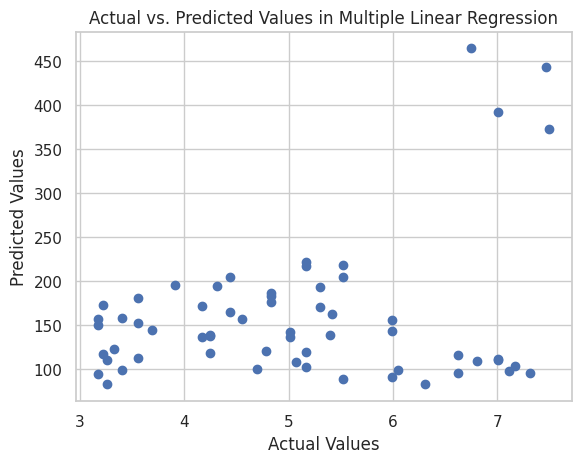

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

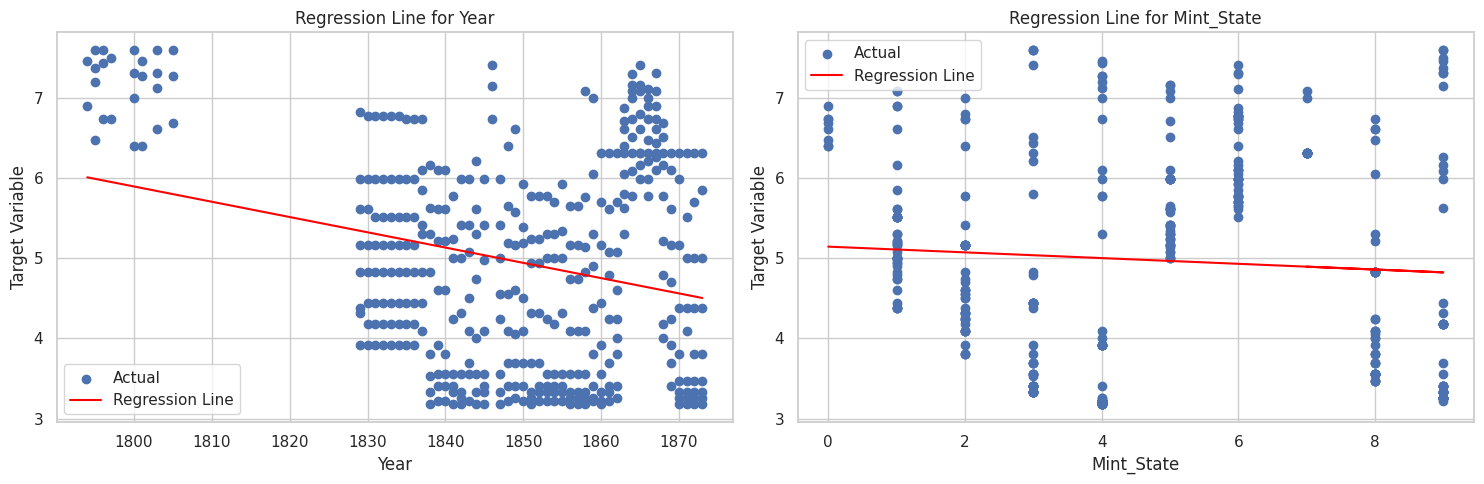

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsHalfDime[coinsHalfDime['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
3263,1858,7,1200.0,7.090077
3272,1859,7,1100.0,7.003065
3281,1860,7,550.0,6.309918
3290,1861,7,550.0,6.309918
3299,1862,7,550.0,6.309918
3308,1863,7,550.0,6.309918
3317,1864,7,550.0,6.309918
3326,1865,7,550.0,6.309918
3335,1866,7,550.0,6.309918
3344,1867,7,550.0,6.309918


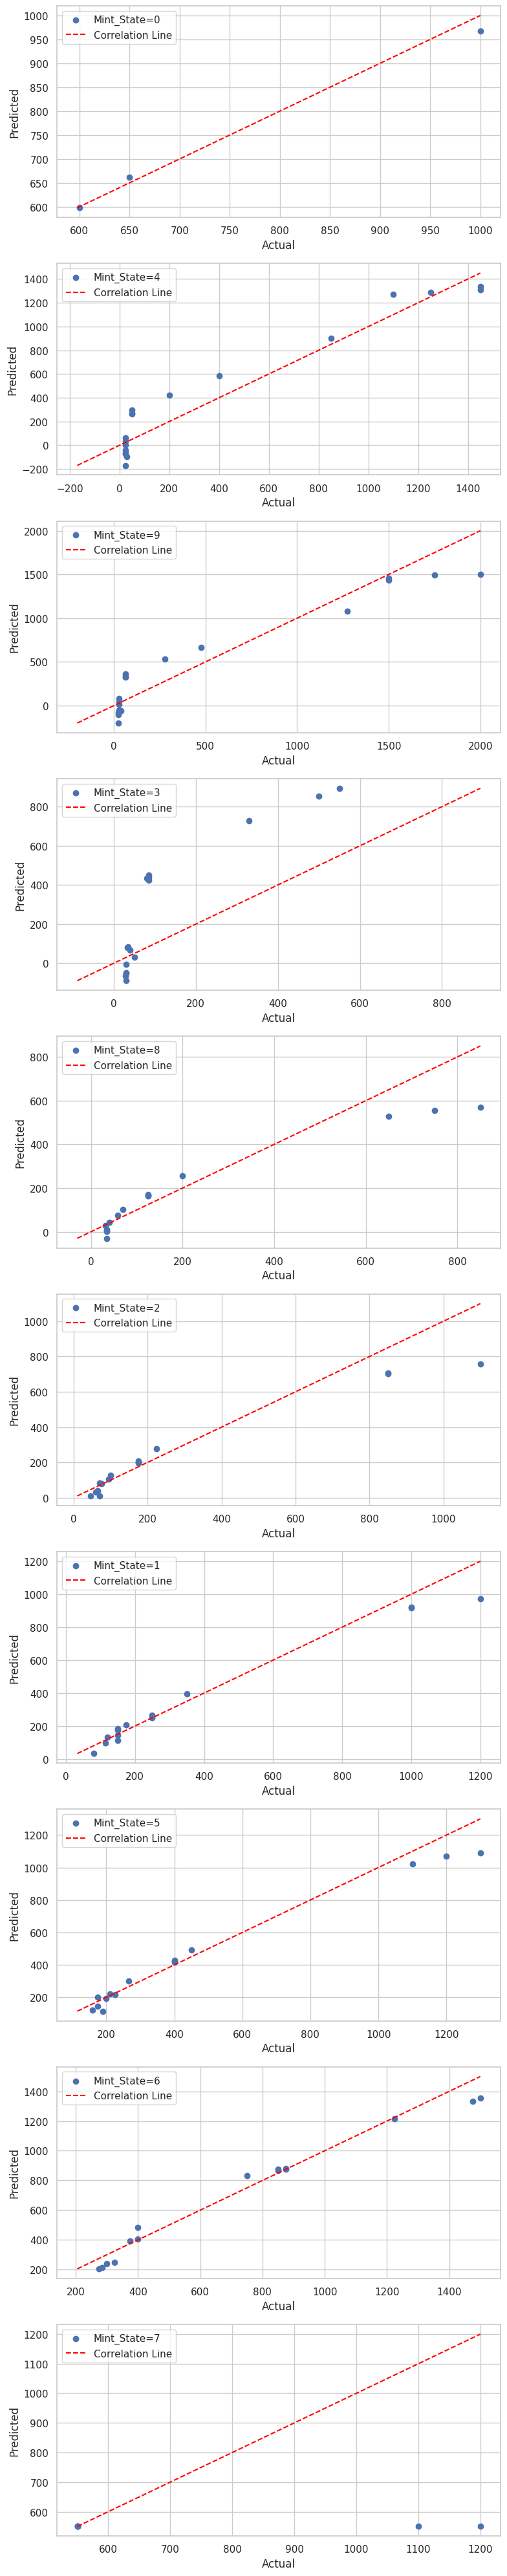

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsHalfDime.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsHalfDime['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsHalfDime[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfDime[coinsHalfDime[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

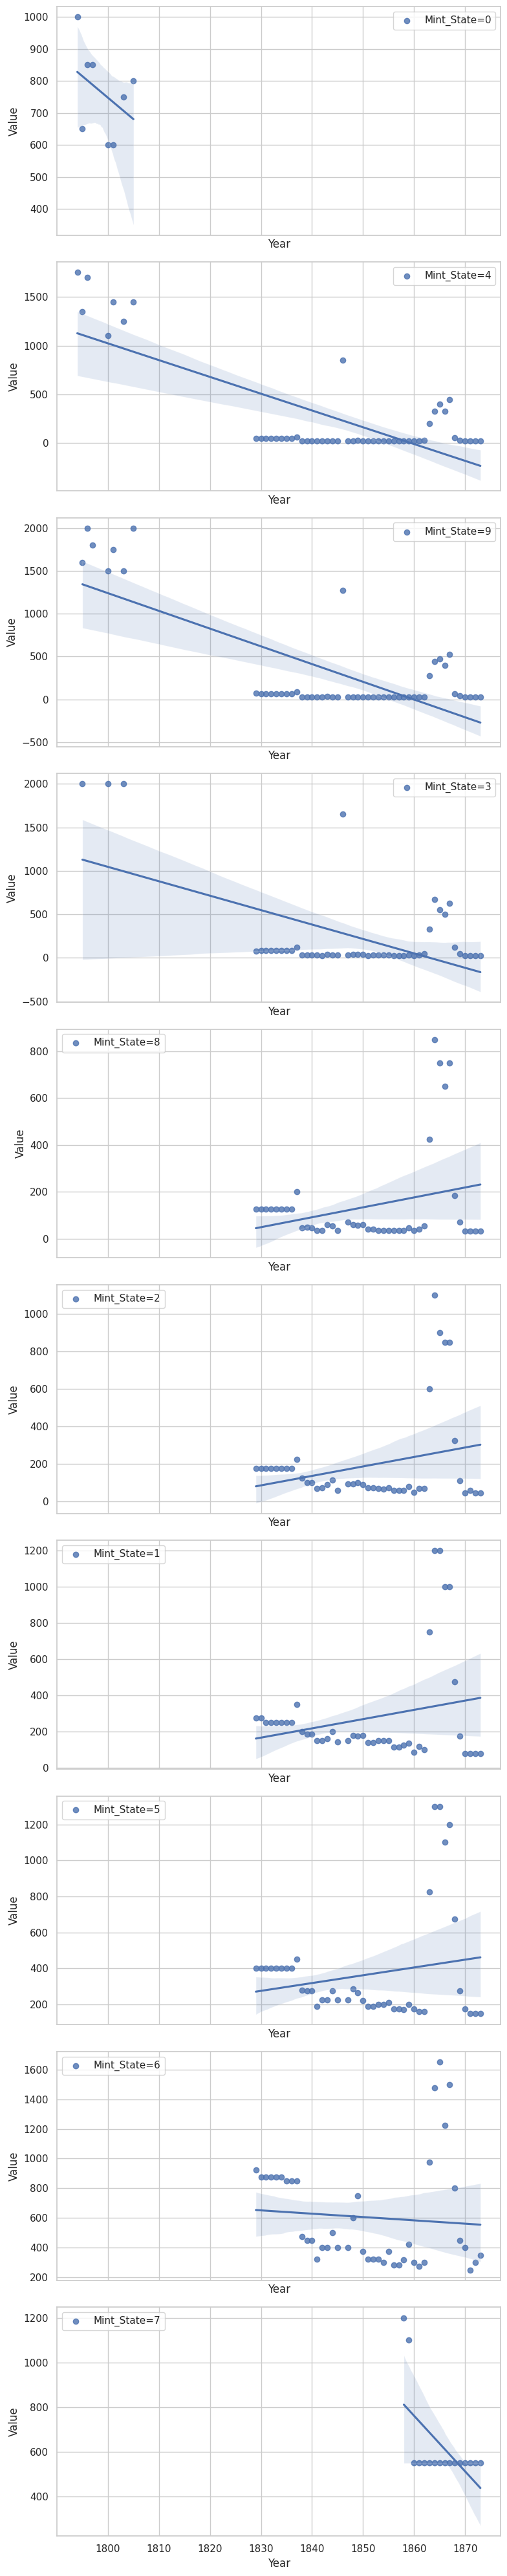

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsHalfDime[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfDime[coinsHalfDime[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.379248  -0.344808
Mint_State       NaN         NaN       NaN        NaN
Value      -0.379248         NaN  1.000000   0.996883
log_Value  -0.344808         NaN  0.996883   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.755281  -0.630130
Mint_State       NaN         NaN       NaN        NaN
Value      -0.755281         NaN  1.000000   0.925863
log_Value  -0.630130         NaN  0.925863   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.743248  -0.632056
Mint_State       NaN         NaN       NaN        NaN
Value      -0.743248         NaN  1.000000   0.925171
log_Value  -0.632056         NaN  0.925171   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.560025  -0.429543
Mint_State       NaN         NaN       NaN        NaN
Value      -0.560025        

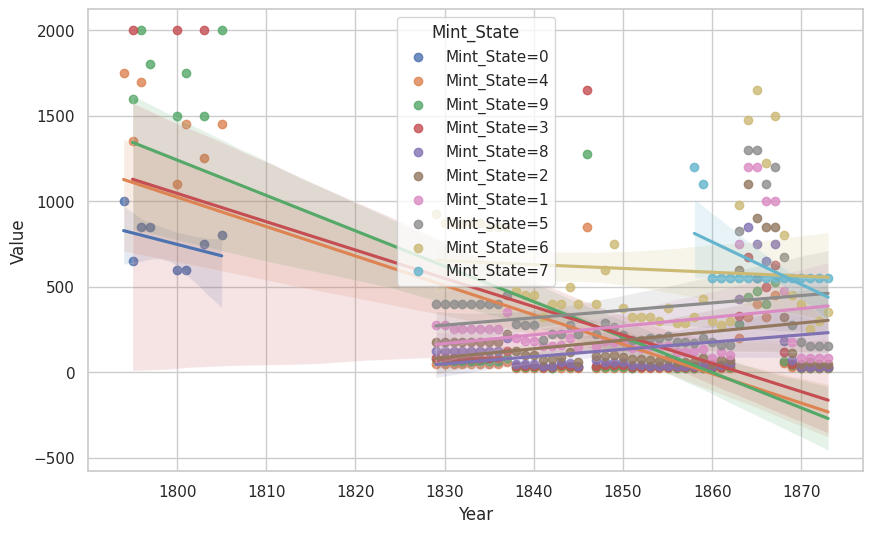

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDime[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDime[coinsHalfDime[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsHalfDime.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.081024,-0.367781,-0.262598
Mint_State,0.081024,1.000000,0.036074,-0.073271
Value,-0.367781,0.036074,1.000000,0.853765
log_Value,-0.262598,-0.073271,0.853765,1.000000


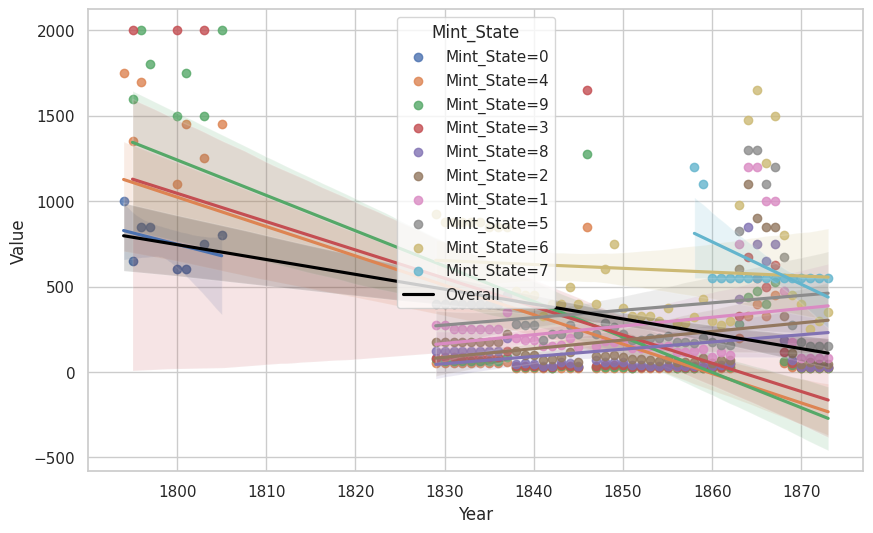

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDime[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDime[coinsHalfDime[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfDime[attribute_column], y=coinsHalfDime[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

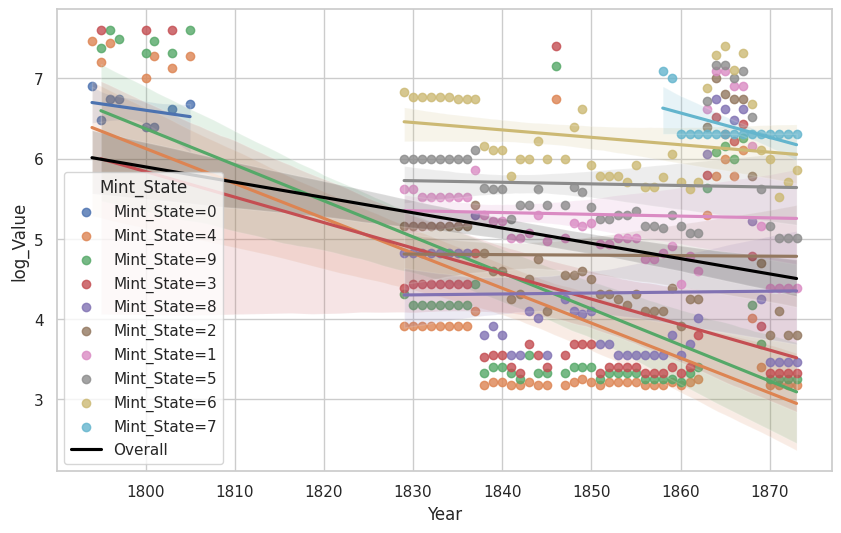

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDime[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDime[coinsHalfDime[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfDime[attribute_column], y=coinsHalfDime[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()